# 1
- For this, we are implementing liner regression from scratch

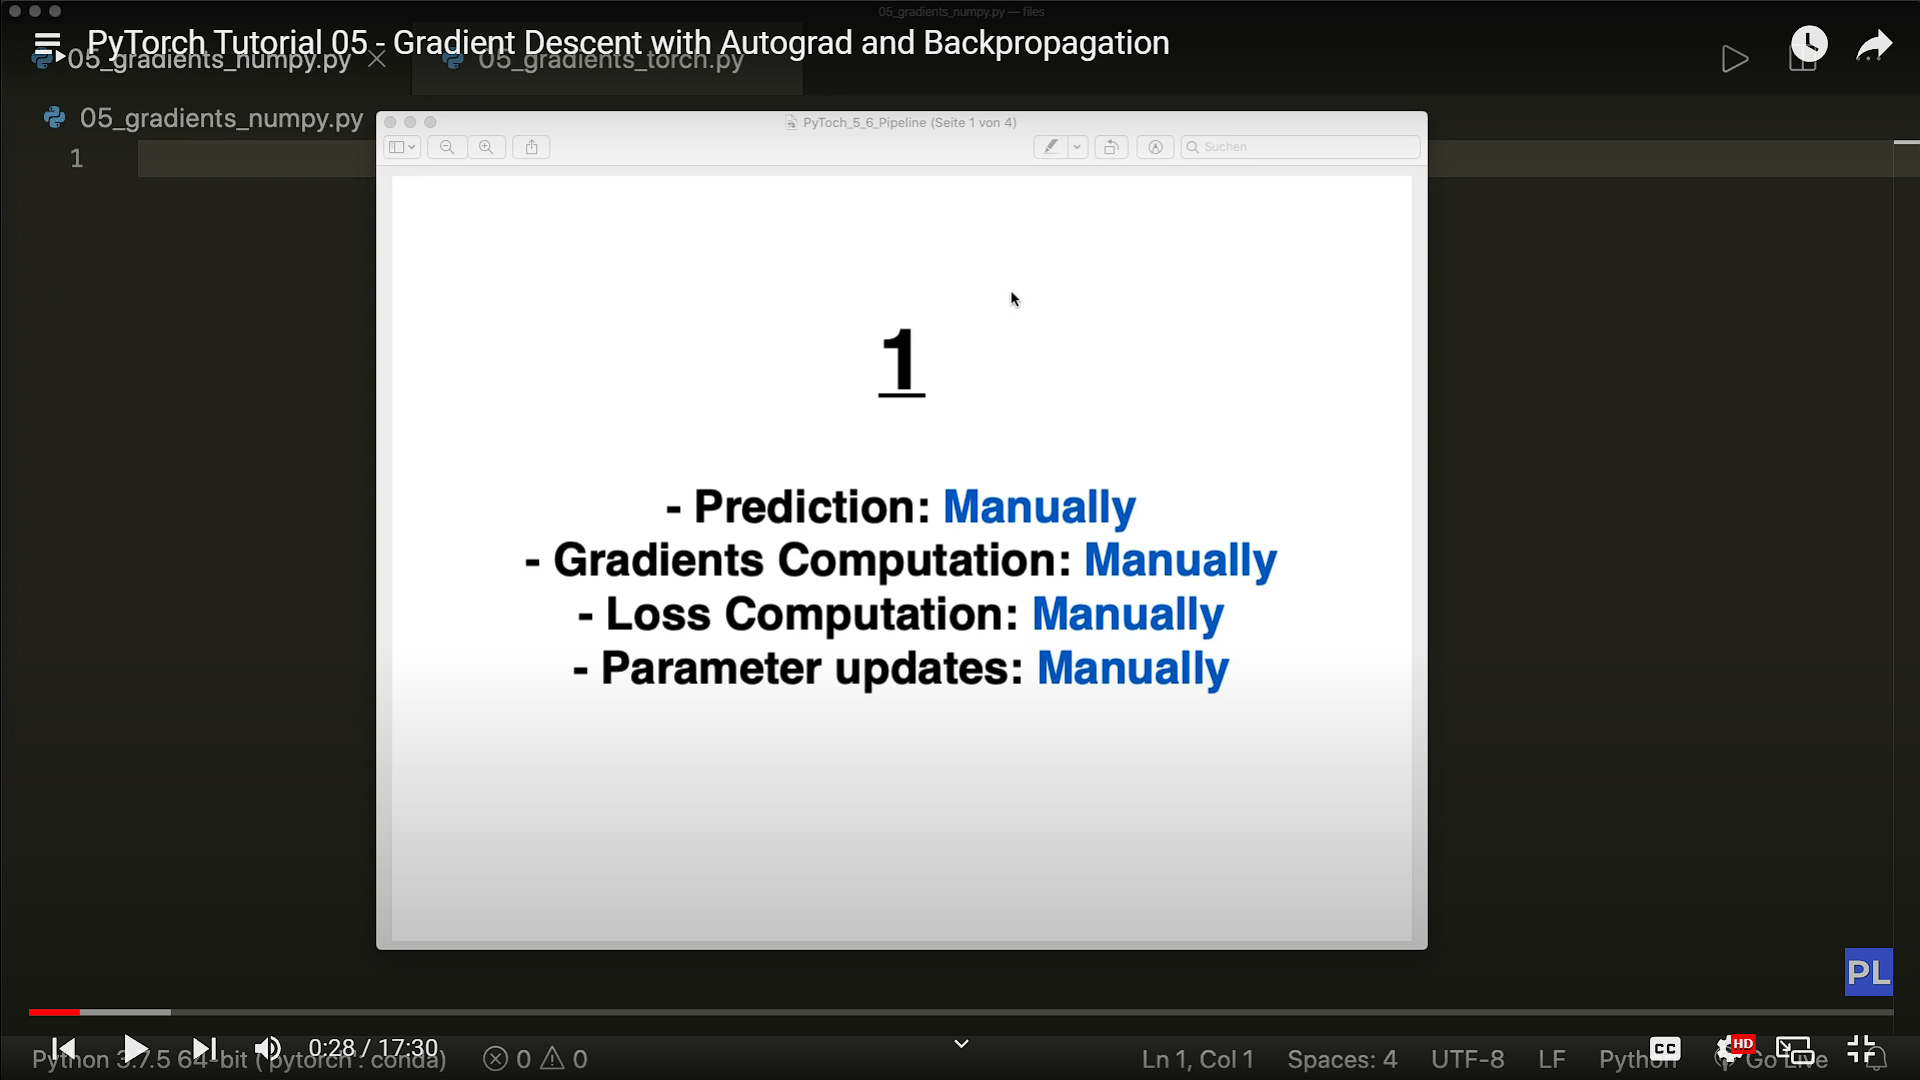

In [4]:
import numpy as np

In [5]:
# create some samples
X=np.array([1,2,3,4])
y=np.array([2,4,6,8]) 

# the relationship between X and y is linear i.e y=2x. Hence our desired weight or slope should be 2.

In [11]:
#initialize weights
w=0.0

#calculate prediction and loss in forward pass
def forward(X):
    return X*w

#MSE
def getloss(y,y_pred):
    return ((y-y_pred)**2).mean()


In [7]:
#backward pass
#loss = MSE = 1/N (w.x - y)**2 -- w.x ==y_predicted
# dloss/ dw = 1/N 2x (w.x-y)
def gradient(X,y,y_pred):
    return np.dot(2*X,y_pred-y)


In [13]:
print(f'Prediction before training for x=5:{forward(5)}')

learning_rate = 0.01
n_iters=20

for epoch in range(n_iters):
    
    # perform forward pass-- prediction and loss calculation
    y_pred=forward(X)
    ls=getloss(y,y_pred)
    
    # perform backward pass - gradient calculation and update weights
    dw= gradient(X,y,y_pred)
    
    w-= learning_rate*dw
    
    print(f'epoch {epoch+1}, w={w}, loss = {ls}')

print(f'After training, prediction of x=5 is:{forward(5)}')
    

Prediction before training for x=5:9.998951424
epoch 1, w=1.99991611392, loss = 3.2985348833270984e-07
epoch 2, w=1.999966445568, loss = 5.277655813331181e-08
epoch 3, w=1.9999865782272, loss = 8.44424930133883e-09
epoch 4, w=1.99999463129088, loss = 1.3510798882276239e-09
epoch 5, w=1.999997852516352, loss = 2.16172782108552e-10
epoch 6, w=1.9999991410065407, loss = 3.458764513951409e-11
epoch 7, w=1.9999996564026163, loss = 5.534023222493915e-12
epoch 8, w=1.9999998625610464, loss = 8.854437155303619e-13
epoch 9, w=1.9999999450244186, loss = 1.4167099464965283e-13
epoch 10, w=1.9999999780097675, loss = 2.2667359143944455e-14
epoch 11, w=1.999999991203907, loss = 3.626777441058456e-15
epoch 12, w=1.999999996481563, loss = 5.802843888115405e-16
epoch 13, w=1.9999999985926251, loss = 9.284549705359657e-17
epoch 14, w=1.99999999943705, loss = 1.485528093482545e-17
epoch 15, w=1.9999999997748201, loss = 2.3768446870720822e-18
epoch 16, w=1.999999999909928, loss = 3.8029481993161644e-19
ep

# 2. 
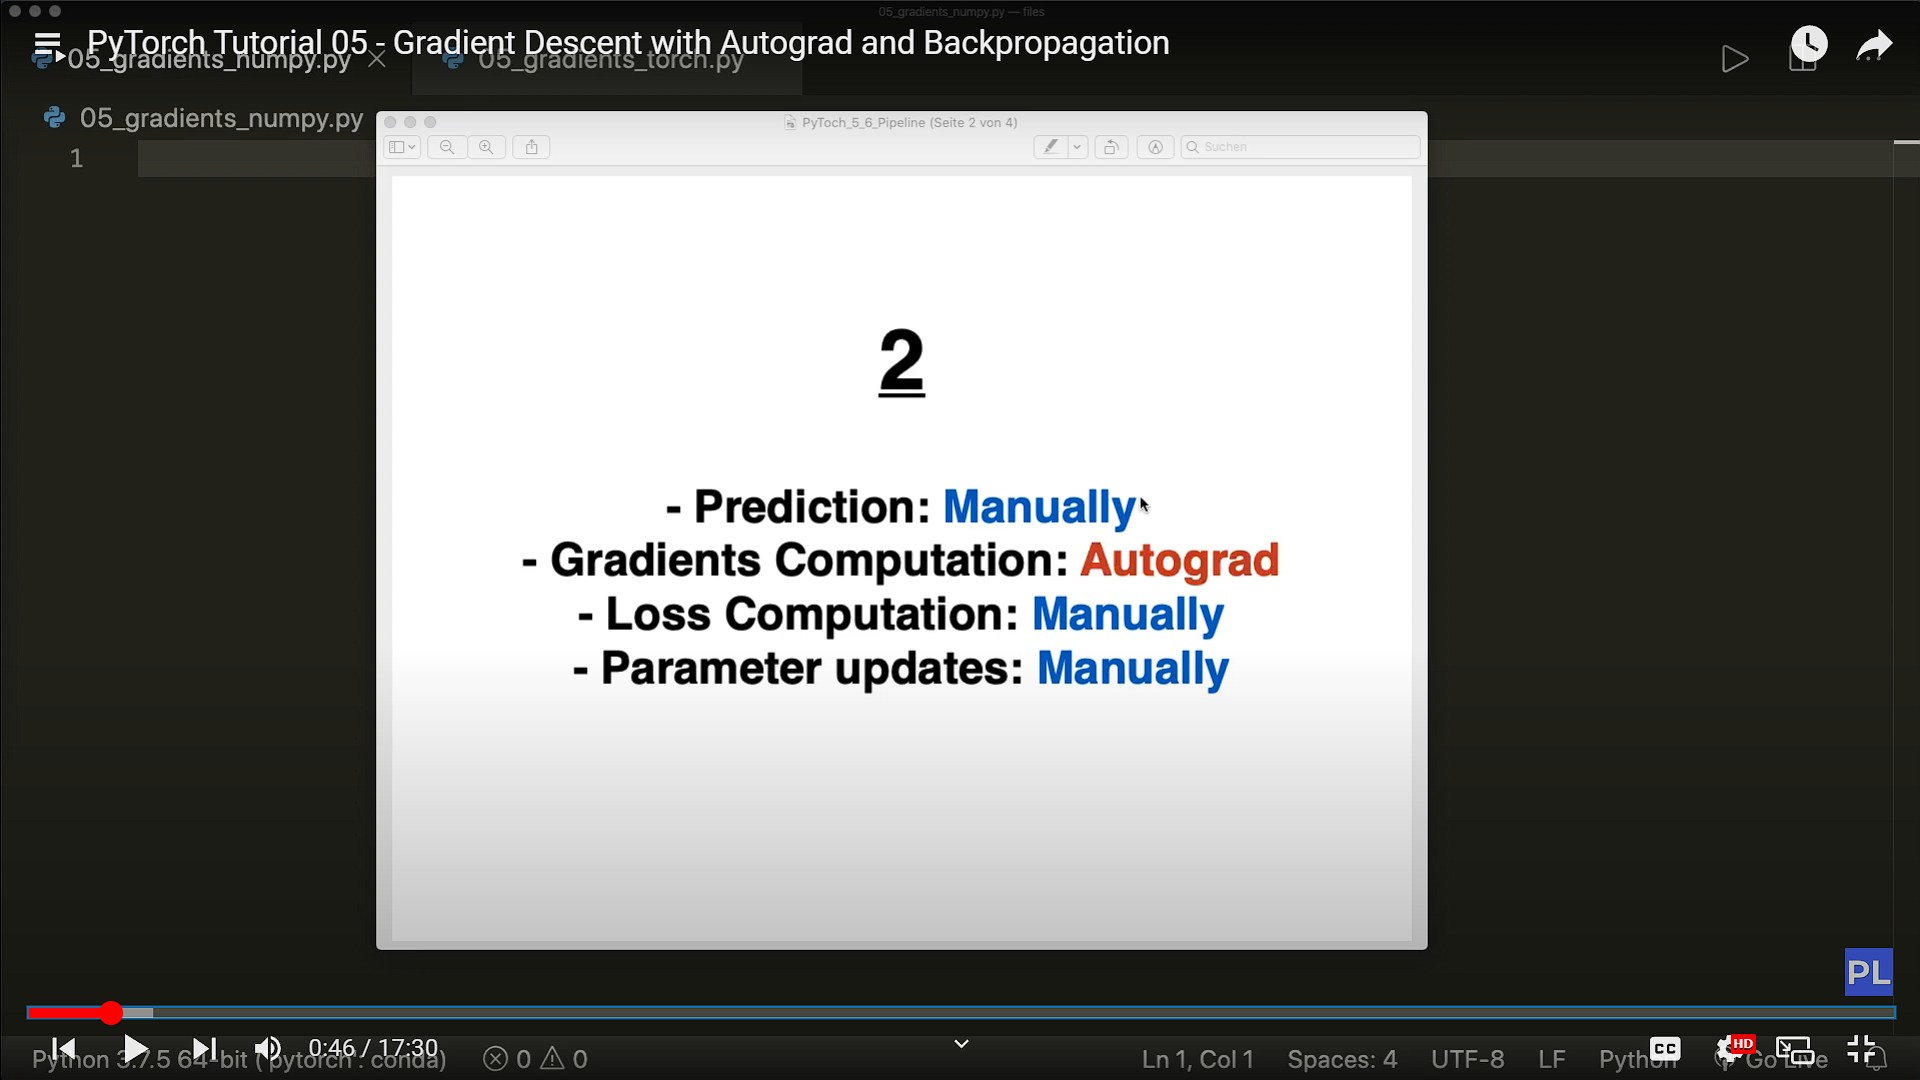

In [14]:
import torch

X = torch.tensor([1,2,3,4])
y=torch.tensor([2,4,6,8])

w = torch.tensor(0.0,requires_grad=True) # gradients of this tensor should be tracked



In [15]:
# forward pass - prediction,loss function 
def forward(X):
    return X*w

def getLoss(y,y_pred):
    return ((y-y_pred)**2).mean()


In [16]:
# backward pass - local gradient calculation and dloss/dw.
#automated

In [18]:
learning_rate=0.01
n_iters=20

for epoch in range(n_iters):
    
    #forward pass
    y_pred=forward(X)
    loss=getLoss(y,y_pred)
    
    #backward pass
    loss.backward()# calculates local gradients and dl/dw
    
    #update weights
    with torch.no_grad():
        dw=w.grad
        w-=learning_rate*dw
    
    #set gradients to zero
    w.grad.zero_() 
    print(f'epoch {epoch+1}, loss:{loss} and weight:{w}')    
    
print(f'Prediction after training x=5 is :{forward(5)}')

epoch 1, loss:0.0450688973069191 and weight:1.934108853340149
epoch 2, loss:0.03256231173872948 and weight:1.9439924955368042
epoch 3, loss:0.02352631464600563 and weight:1.952393651008606
epoch 4, loss:0.016997724771499634 and weight:1.9595346450805664
epoch 5, loss:0.012280836701393127 and weight:1.9656044244766235
epoch 6, loss:0.008872910402715206 and weight:1.9707638025283813
epoch 7, loss:0.0064106592908501625 and weight:1.9751492738723755
epoch 8, loss:0.004631685093045235 and weight:1.9788768291473389
epoch 9, loss:0.0033464201260358095 and weight:1.982045292854309
epoch 10, loss:0.0024177832528948784 and weight:1.9847384691238403
epoch 11, loss:0.0017468547448515892 and weight:1.987027645111084
epoch 12, loss:0.0012621148489415646 and weight:1.9889734983444214
epoch 13, loss:0.0009118800517171621 and weight:1.9906275272369385
epoch 14, loss:0.0006588209653273225 and weight:1.9920333623886108
epoch 15, loss:0.0004760062729474157 and weight:1.9932283163070679
epoch 16, loss:0.00

# 3. 
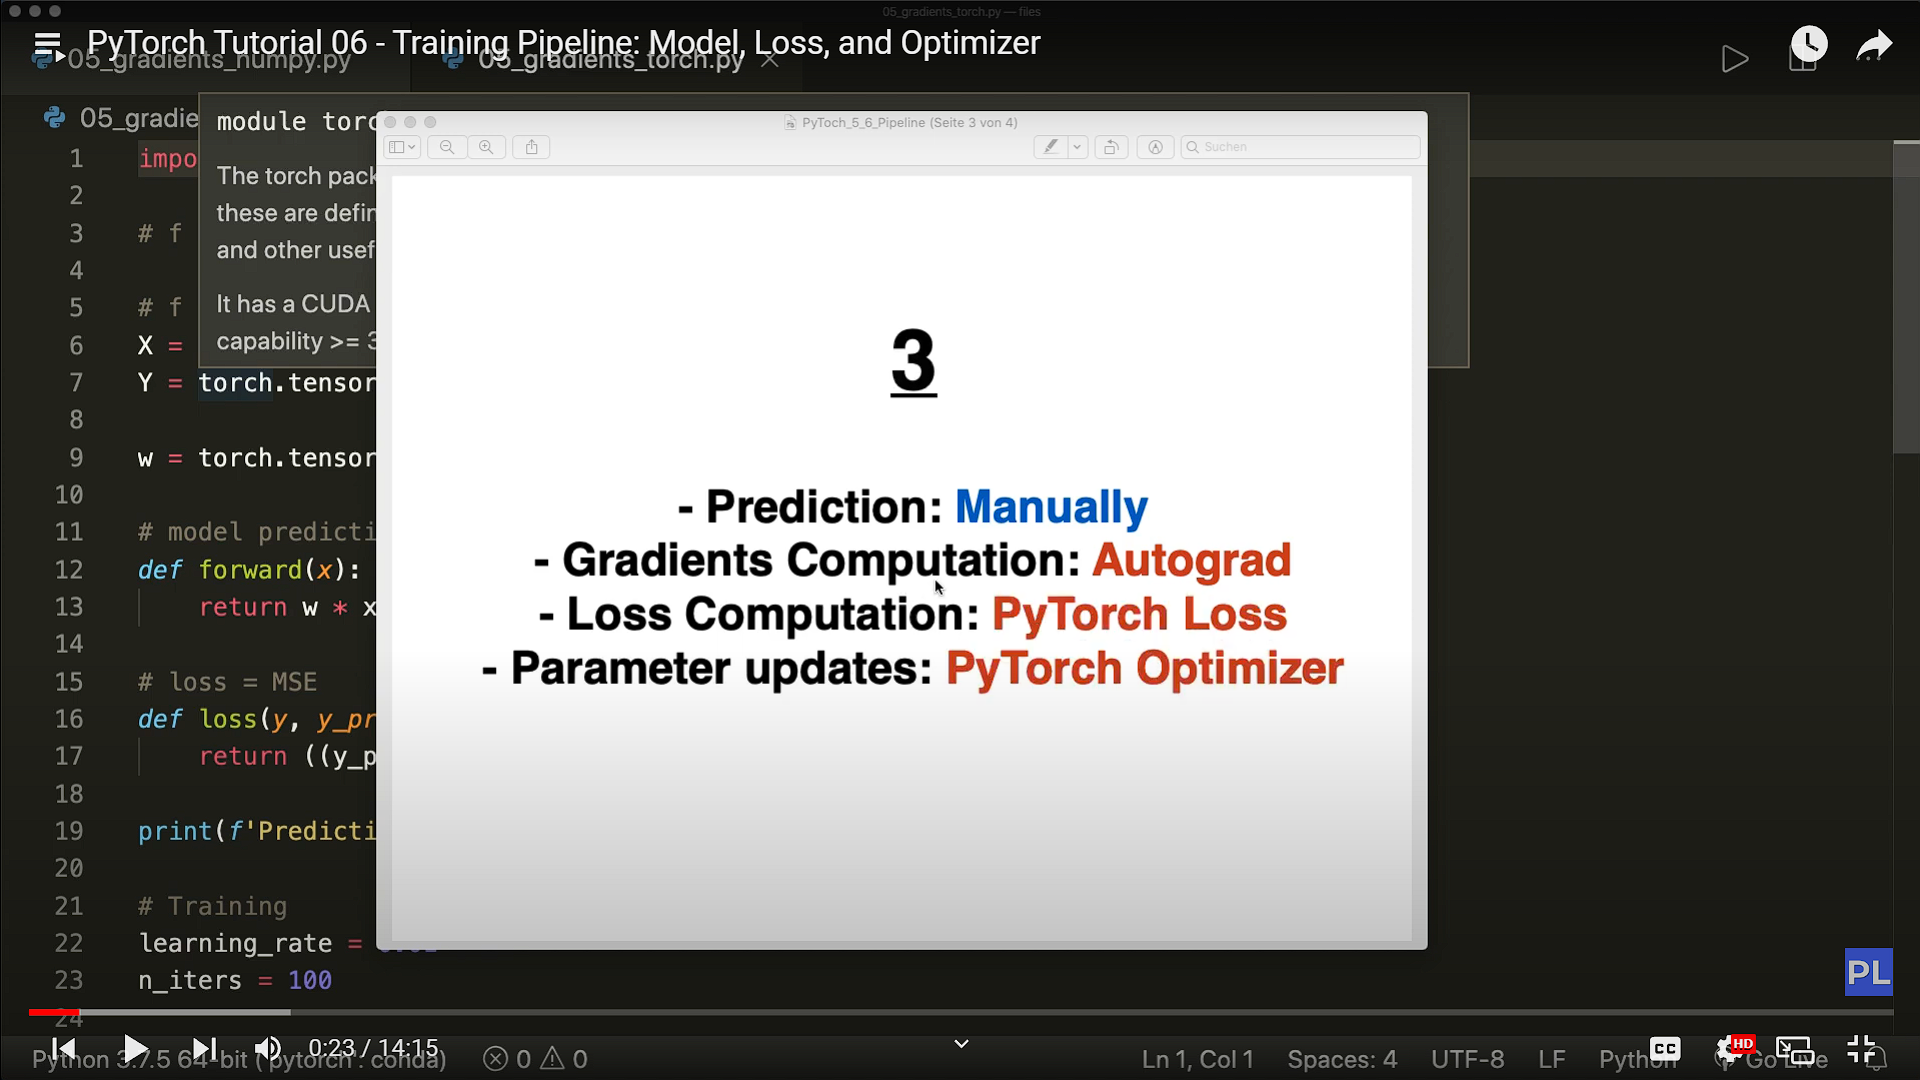

In [22]:
import torch
import torch.nn as nn

X = torch.tensor([1,2,3,4],dtype=torch.float64)
y=torch.tensor([2,4,6,8],dtype=torch.float64)

w = torch.tensor(0.0,dtype=torch.float64,requires_grad=True) # gradients of this tensor should be tracked



In [23]:
# forward pass - prediction,loss function 
def forward(X):
    return X*w

# initialize loss and optimizer
getLoss=nn.MSELoss()
optimizer = torch.optim.SGD([w],lr=0.01)


In [24]:
learning_rate=0.01
n_iters=20

for epoch in range(n_iters):
    
    #forward pass
    y_pred=forward(X)
    loss=getLoss(y,y_pred)
    
    #backward pass
    loss.backward()# calculates local gradients and dl/dw
    
    #update weights
    optimizer.step()
    
    #set gradients to zero
    optimizer.zero_grad()
    print(f'epoch {epoch+1}, loss:{loss} and weight:{w}')    
    
print(f'Prediction after training x=5 is :{forward(5)}')

epoch 1, loss:30.0 and weight:0.3
epoch 2, loss:21.674999999999997 and weight:0.5549999999999999
epoch 3, loss:15.6601875 and weight:0.7717499999999999
epoch 4, loss:11.31448546875 and weight:0.9559875
epoch 5, loss:8.174715751171876 and weight:1.112589375
epoch 6, loss:5.90623213022168 and weight:1.24570096875
epoch 7, loss:4.2672527140851635 and weight:1.3588458234375
epoch 8, loss:3.08309008592653 and weight:1.455018949921875
epoch 9, loss:2.2275325870819183 and weight:1.5367661074335939
epoch 10, loss:1.609392294166685 and weight:1.6062511913185549
epoch 11, loss:1.1627859325354297 and weight:1.6653135126207717
epoch 12, loss:0.840112836256848 and weight:1.715516485727656
epoch 13, loss:0.6069815241955727 and weight:1.7581890128685076
epoch 14, loss:0.43854415123130097 and weight:1.7944606609382314
epoch 15, loss:0.3168481492646149 and weight:1.8252915617974967
epoch 16, loss:0.2289227878436842 and weight:1.8514978275278722
epoch 17, loss:0.16539671421706198 and weight:1.8737731533

# 4.
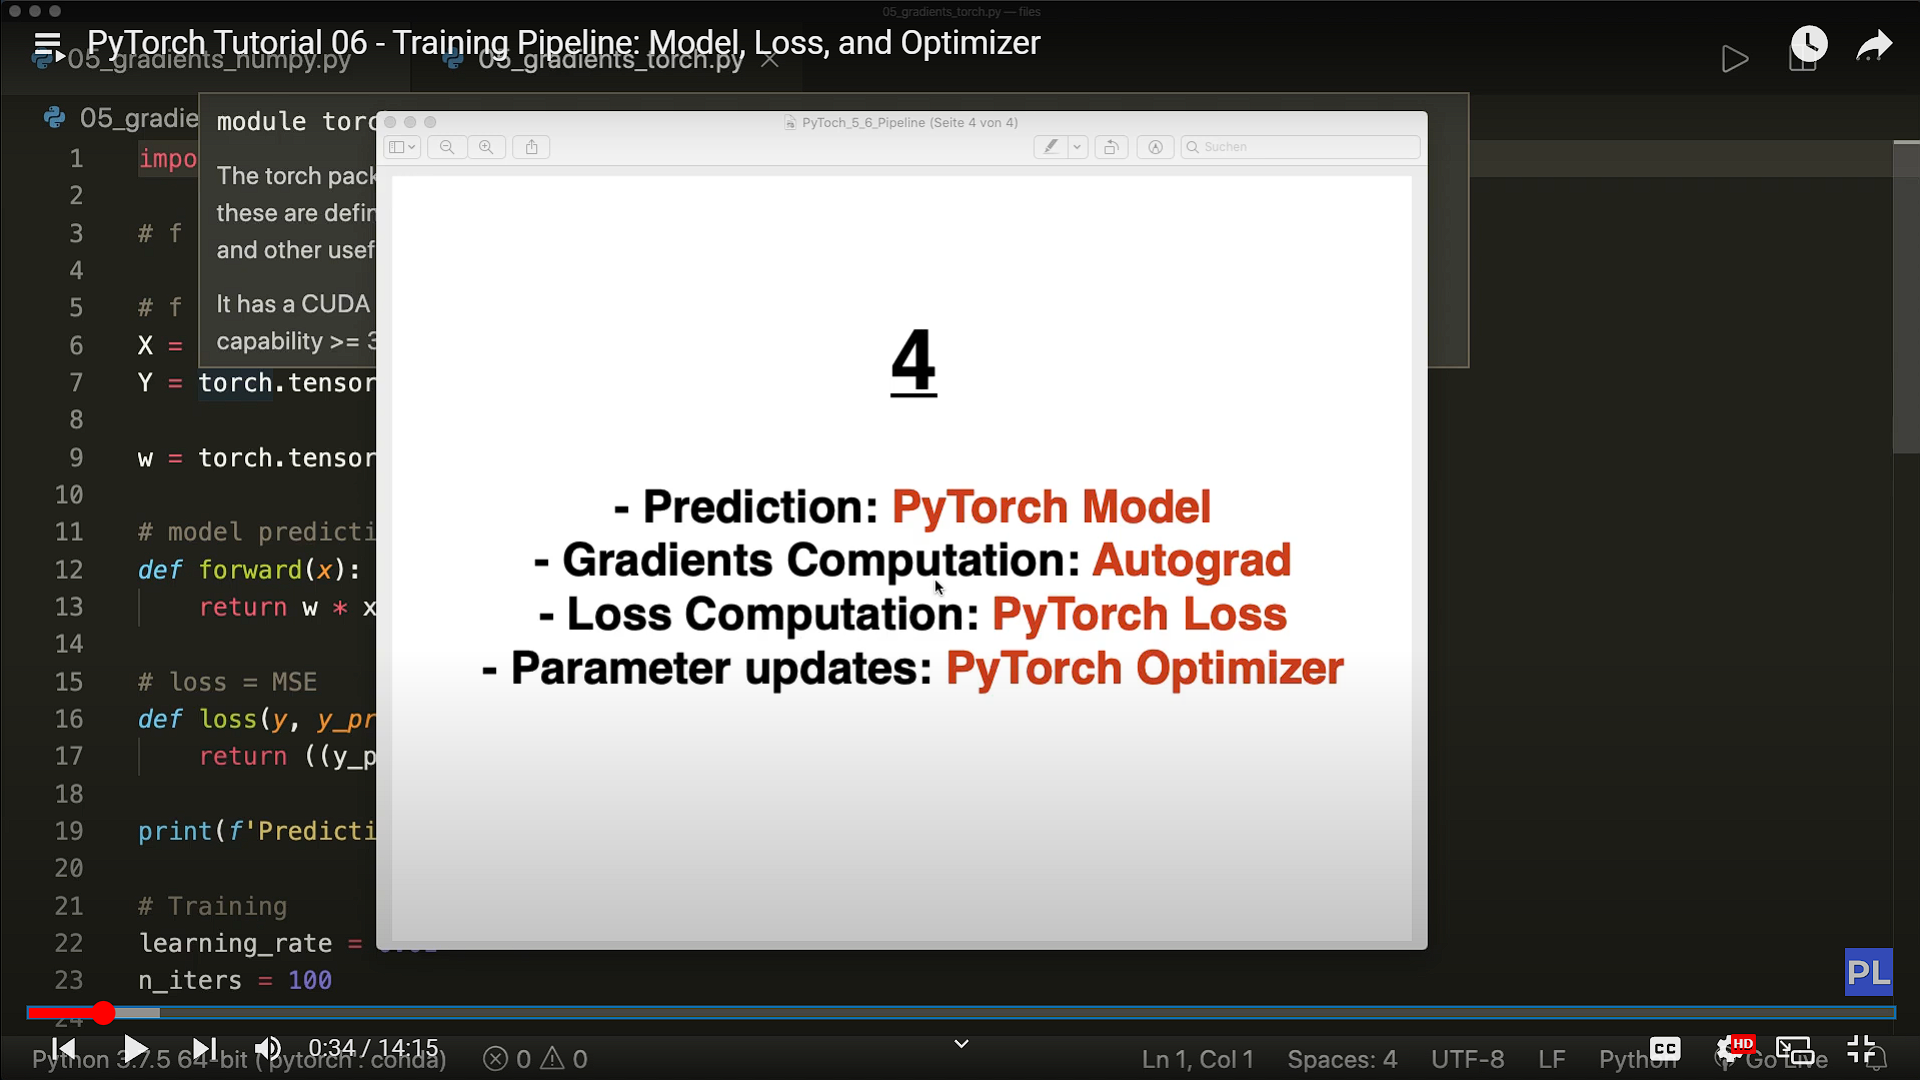

In [2]:
import torch
import torch.nn as nn

# since we are using natively implemented model, we need to pass data in terms of list of rows
X = torch.tensor([[1],[2],[3],[4]],dtype = torch.float32)
y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)
X_test=torch.tensor([5],dtype=torch.float32)

#weights are initialized randomly in natively implemented model
#w = torch.tensor(0.0,requires_grad=True) # gradients of this tensor should be tracked

n_samples,n_features=X.shape
print(n_samples,n_features)

input_size,output_size = n_features,n_features

4 1


In [8]:
learning_rate=0.01
n_iters=100

# initialize model 
model = nn.Linear(input_size,output_size)

#initialize the optimizer and loss
getLoss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)# weights are taken from the model directly




In [9]:
for epoch in range(n_iters):
    
    #perform prediction
    y_pred=model(X)
    
    #calculate loss
    loss=getLoss(y,y_pred)
    
    #initiate backward pass
    loss.backward()
    
    #optimize weights
    optimizer.step()
    
    #set gradients to zero
    optimizer.zero_grad()
    
    [w,b]=model.parameters()
    print(f'epoch:{epoch+1}, loss:{loss} and weight:{w[0][0]}')
print(f'AFter training, prediction of x=5 is:{model(X_test)}')


epoch:1, loss:29.259265899658203 and weight:0.657982349395752
epoch:2, loss:20.310157775878906 and weight:0.904011607170105
epoch:3, loss:14.100519180297852 and weight:1.1088868379592896
epoch:4, loss:9.79173469543457 and weight:1.279481291770935
epoch:5, loss:6.801915168762207 and weight:1.4215202331542969
epoch:6, loss:4.727295875549316 and weight:1.539772868156433
epoch:7, loss:3.287716865539551 and weight:1.638211727142334
epoch:8, loss:2.2887778282165527 and weight:1.7201461791992188
epoch:9, loss:1.595589280128479 and weight:1.7883325815200806
epoch:10, loss:1.114556908607483 and weight:1.8450672626495361
epoch:11, loss:0.7807343602180481 and weight:1.8922629356384277
epoch:12, loss:0.5490573644638062 and weight:1.931512713432312
epoch:13, loss:0.38825851678848267 and weight:1.964143991470337
epoch:14, loss:0.276639461517334 and weight:1.9912621974945068
epoch:15, loss:0.19914621114730835 and weight:2.0137882232666016
epoch:16, loss:0.14533229172229767 and weight:2.03248906135559